## Option 1: Pyber

### Import Dependencies

In [54]:
%matplotlib notebook
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams

## The data

The data for analysis if from Uber and Lyft companies' complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

## Objective of the Analysis

The objective of this analysis is to provide data-backed guidance on new opportunities for market differentiation. Specifically, it is aimed to analysis the ride market sharing among the current successful players like Uber and Lyft. The outcome of this analsysis is intended to provide an insight to let me decide to join a fledgling ride sharing company of your own or not.

## Outcome of the Analyis

* Analysis was conducted to find out the ride sharing in the selected cities of the USA having have Urban, Suburban and Rural characteristic. The study tooks one month and and expnese of USD XXX. The following are the major trends drown from this analysis:
    * _**Trend 1**_: It was observered that Urban areas tend to have more riders. (see the large size of the bubble for Urban, followed by Suburban) 
    
    * _**Trend 2**_: Because of the force of demand and supply of the market, it was also observed that there were more drivers who are willing to supply into the Urban market for ride service. 
    * _**Trend 3**_: Finally, it is observerd that there is high fare rate in Urban area (62.7%) in comparsion to Suburban (30.5%) and Rural (6.8%) areas.
    

## Conclusion and Recommendation
* The study has observed the relationship that exist between demand and supply for the ride service accross the selected Urban, Suburban and Rural areas. It was found out that the demand for ride service, it fare and supply of drivers are highter in the Urban. However, in order to get more information regarding this trend, anaysis of **Causality** with the use of statiscal and econometrict tools are needed in the future.  

## Loading the data

In [55]:
# Files link
city_data = ('/Users/abulla/Desktop/python/01 Best of python/Matplotlib/part_3/USCLOS201805DATA1-Class-Repository-DATA-master 8/02-Homework/05-Matplotlib/Instructions/Pyber/raw_data/city_data.csv')
ride_data = ('/Users/abulla/Desktop/python/01 Best of python/Matplotlib/part_3/USCLOS201805DATA1-Class-Repository-DATA-master 8/02-Homework/05-Matplotlib/Instructions/Pyber/raw_data/ride_data.csv')

In [56]:
city_data_df= pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

## Inspecting the data

In [57]:
city_data_df.head(3)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [58]:
ride_data_df.head(3)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003


* Ask these questions:
    * Are there any missing values? 
    * Is there information unneccesary for downstream processing? 
    * Are the datatypes mixed or incorrect? 
    * And if so, **you need to clean it!!**

In [59]:
# If there may be name duplicate in the city, drop them by using drop_duplicate() function
city_data_df = city_data_df.drop_duplicates('city', keep= 'first')

* ** Now merge them!**

In [60]:
df = pd.merge(city_data_df, ride_data_df, on = 'city', how = 'outer')

In [61]:
# View the combined data
df.head(3)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416


-----------------

-----------------

## Make Bubble Plot based on:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)



In [62]:
%matplotlib inline

### Create the three variables for the analysis:

In [74]:
#groupby('city')
gb_city = df.groupby("city")
# Average Fare ($) Per City
avg_fare = gb_city.mean()['fare']

# rides by city
ride_count = gb_city['ride_id'].count()
#  Drivers by City
driver_count = gb_city.mean()['driver_count']
# City Type (Urban, Suburban, Rural)
city_type = city_data_df.set_index('city')['type']


In [76]:
# define the variables for each city type
ru_avg_fare =rural['Average Fare']
num_dir_ru = rural['Number of Drivers']
subur_avg_fare = suburban['Average Fare']
num_dir_subur = suburban['Number of Drivers']
urb_avg_fare = urban['Average Fare']
num_dir_utb = urban['Number of Drivers']

In [77]:
# Now create a DataFrame using pandas.DataFrame() function
Ride_df = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type})


In [78]:
# provide approprate naming for city catagories
rural = Ride_df[Ride_df['Type of City'] == 'Rural']
suburban = Ride_df[Ride_df['Type of City'] == 'Suburban']
urban = Ride_df[Ride_df['Type of City'] == 'Urban']


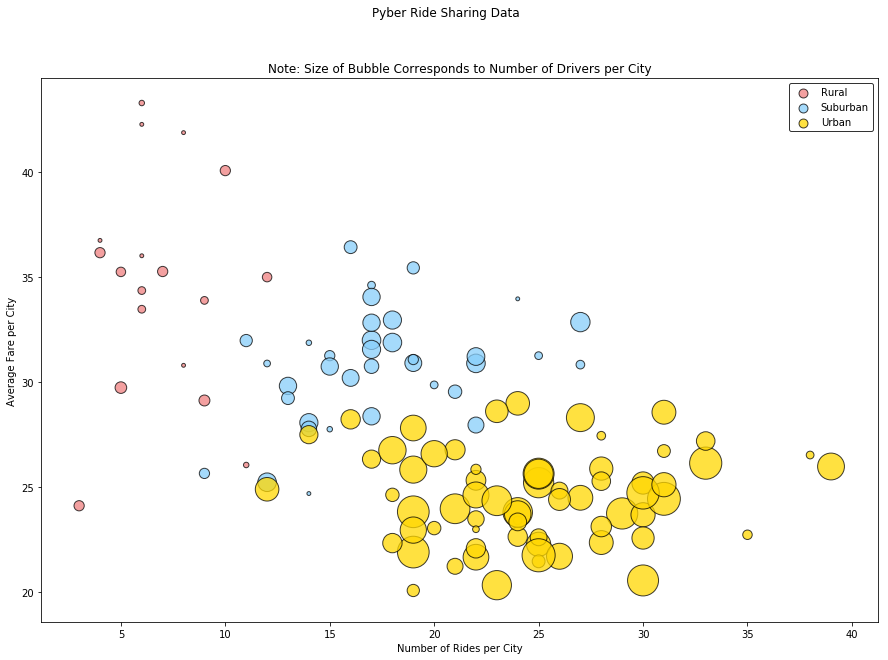

In [79]:
#size of the figure
plt.figure(figsize=(15,10))

# Create a dictionary containing the colors of bubbles (Gold, Light Sky Blue, and Light Coral)
colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

# provide color for each city categories
color_city = {'Urban': colors['Gold'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Light Coral']}
# subtitle for the scatter plot
plt.suptitle('Pyber Ride Sharing Data')

# make a scatter plots for each city type
plt.scatter(rural['Number of Rides'], ru_avg_fare, s = num_dir_ru*15, color = color_city['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], subur_avg_fare, s = num_dir_subur*15, color = color_city['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urb_avg_fare, s = num_dir_utb*15, color = color_city['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note: Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

#print out the legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]

plt.show()

------- 

---------

## % of Total Fares by City Type


In [68]:
%matplotlib inline

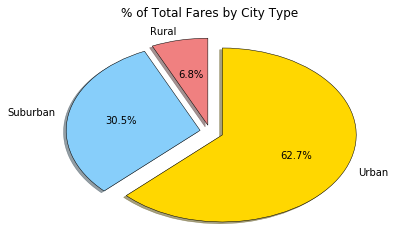

In [80]:
# Group the whole or merged data by City Type 
gbyc_type = df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
# now sum up total fare per city in the gbyc_type
Sum_fare_Pcity = gbyc_type.sum()['fare']
# Let use the lables name in Sum_fare_Pcity to be assigned for pie chart
labels = Sum_fare_Pcity.index
# assign the same colors to the pie chart as in the above scatter bubble plot
# by just looping through our "color_city"
col = [color_city[i] for i in labels]
# expode for the city categories in the pie
explode = [0.075,0.075, 0.10]
plt.pie(Sum_fare_Pcity, startangle = 90, colors = col, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
# Set title for the pie chart
plt.title ("% of Total Fares by City Type")
plt.show()

**-------------**

------------

##  % of Total Rides by City Type


In [81]:
%matplotlib inline

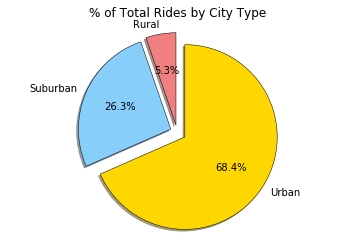

In [82]:
# number of ride per city type
ride_sumbyc = gbyc_type.count()['ride_id']

labels = ride_sumbyc.index
plt.pie(ride_sumbyc, startangle = 90, explode = explode, colors = col, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

**----------------**

## % of Total Drivers by City Type

In [83]:
%matplotlib inline

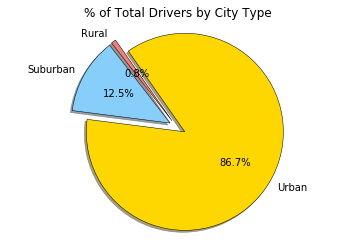

In [84]:
# of driver per city type
driver_sumbyc = gbyc_type.sum()['driver_count']

labels = driver_sumbyc.index
plt.pie(driver_sumbyc, startangle = 125, explode = explode, colors = col, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

------------

----------